### Импорт библиотек и датасетов

In [262]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [263]:
users = pd.read_csv('users.tsv',sep='\t')
history = pd.read_csv('history.tsv',sep='\t')
validate = pd.read_csv('validate.tsv',sep='\t')
validate_answers = pd.read_csv('validate_answers.tsv',sep='\t')

### Инфо

In [264]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [265]:
history.info()
history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [266]:
validate.info()
validate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [267]:
validate_answers.info()
validate_answers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   at_least_one    1008 non-null   float64
 1   at_least_two    1008 non-null   float64
 2   at_least_three  1008 non-null   float64
dtypes: float64(3)
memory usage: 23.8 KB


,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


### Визуализация

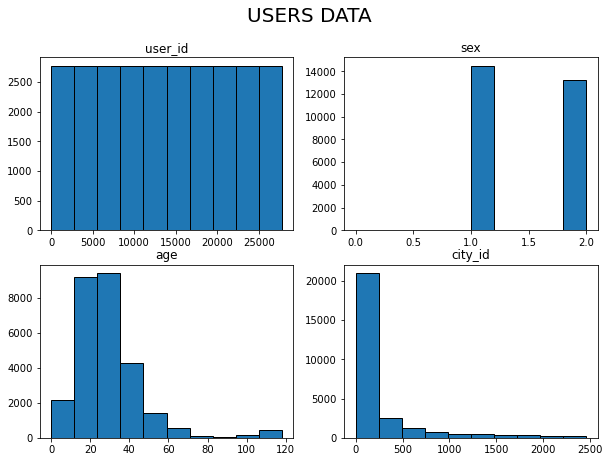

In [268]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('USERS DATA', fontsize = 20)

for i in range(len(users.columns)):
    plt.subplot(2,2,i+1)
    plt.title(users.columns[i])
    plt.hist(users[users.columns[i]], edgecolor='black')


plt.show()

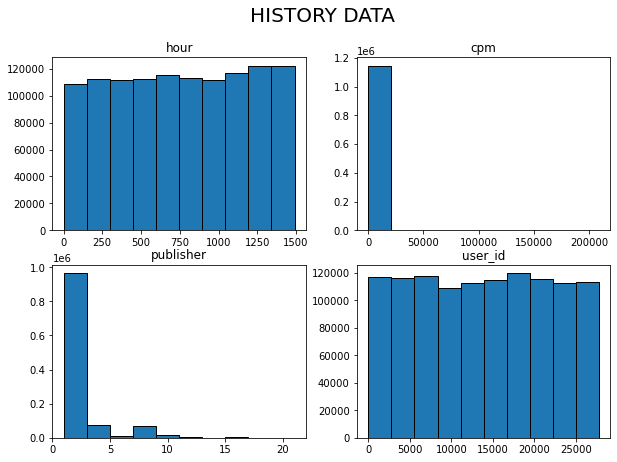

In [269]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('HISTORY DATA', fontsize = 20)

for i in range(len(history.columns)):
    plt.subplot(2,2,i+1)
    plt.title(history.columns[i])
    plt.hist(history[history.columns[i]], edgecolor='black')

plt.show()

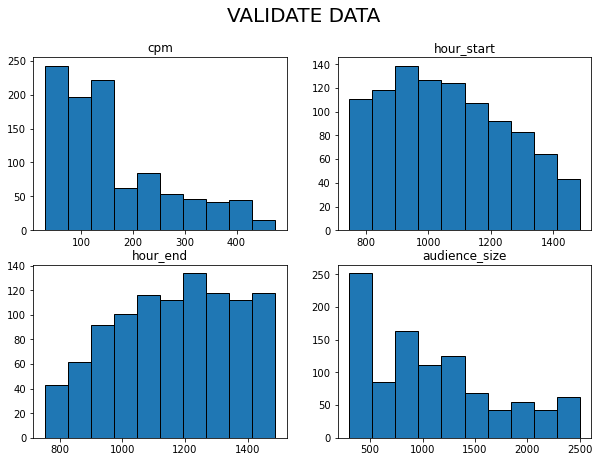

In [270]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('VALIDATE DATA', fontsize = 20)

validate_vis = validate.drop(['publishers','user_ids'],axis=1) # Эти 2 колонки содержат списки, не уверен, как их визуализировать

for i in range(len(validate_vis.columns)):
    plt.subplot(2,2,i+1)
    plt.title(validate_vis.columns[i])
    plt.hist(validate_vis[validate_vis.columns[i]], edgecolor='black')

plt.show()

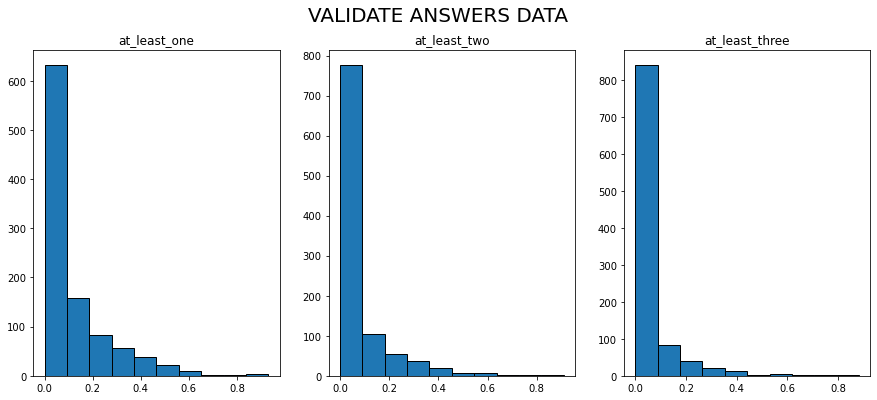

In [271]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.suptitle('VALIDATE ANSWERS DATA', fontsize = 20)

for i in range(len(validate_answers.columns)):
    plt.subplot(1,3,i+1)
    plt.title(validate_answers.columns[i])
    plt.hist(validate_answers[validate_answers.columns[i]], edgecolor='black')

plt.show()

### Корреляция validate и validate_answers

#### Выделение, преобразование и удаление признаков

Для удобства обозначений

In [386]:
X = validate.copy()
Y = validate_answers.copy()

Выделение

In [387]:
X.insert(len(X.columns),
         'delay',
         X['hour_end']-X['hour_start'])

In [ ]:
# Вытаскиваем пол и возраст ЦА

male_prop = []

age_mean = []
age_std = []
city_count = []

for index, row in X.iterrows():
    
    users_info = users[
        users['user_id'].isin(
            [ int(i) for i in row['user_ids'].split(',')]
        )
    ]

    male_prop.append((users_info['sex'] == 0).sum() / row['audience_size'])
    

    age_mean.append(users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].mean())
    age_std.append(users_info[(users_info['age'] < 100) & (users_info['age'] > 0)]['age'].std())
    city_count.append(len(users_info['city_id'].unique()))

X['male_prop'] = male_prop
X['age_mean'] = age_mean
X['age_std'] = age_std
X['city_count'] = city_count

Преобразование

In [389]:
for column in X.columns: 
    if column in ['publishers', 'user_ids']:
        continue
    X[column] = (X[column] - X[column].mean()) / X[column].std() 

In [ ]:
from sklearn.decomposition import PCA

X[['pca1','pca2']] = PCA(2).fit_transform(X[['city_count', 'audience_size']])

In [393]:
X['publishers_count'] = X['publishers'].apply(lambda s: s.count(','))

Удаление

In [397]:
X = X.drop(['hour_end', 'hour_start', 'publishers', 'user_ids', 'city_count', 'audience_size'], axis = 1)

Формируем общий датафрейм для удобства

In [398]:
df = pd.concat([X, Y], axis = 1)

#### Матрицы

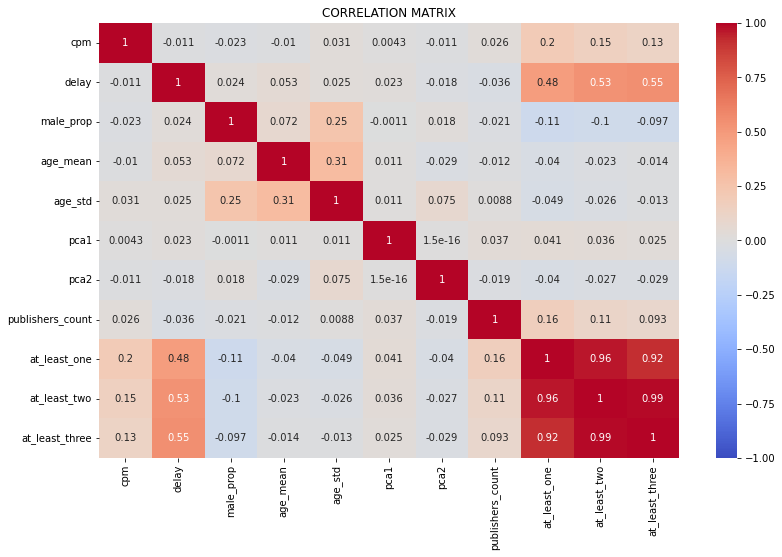

In [399]:
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(8)

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('CORRELATION MATRIX')
plt.show()

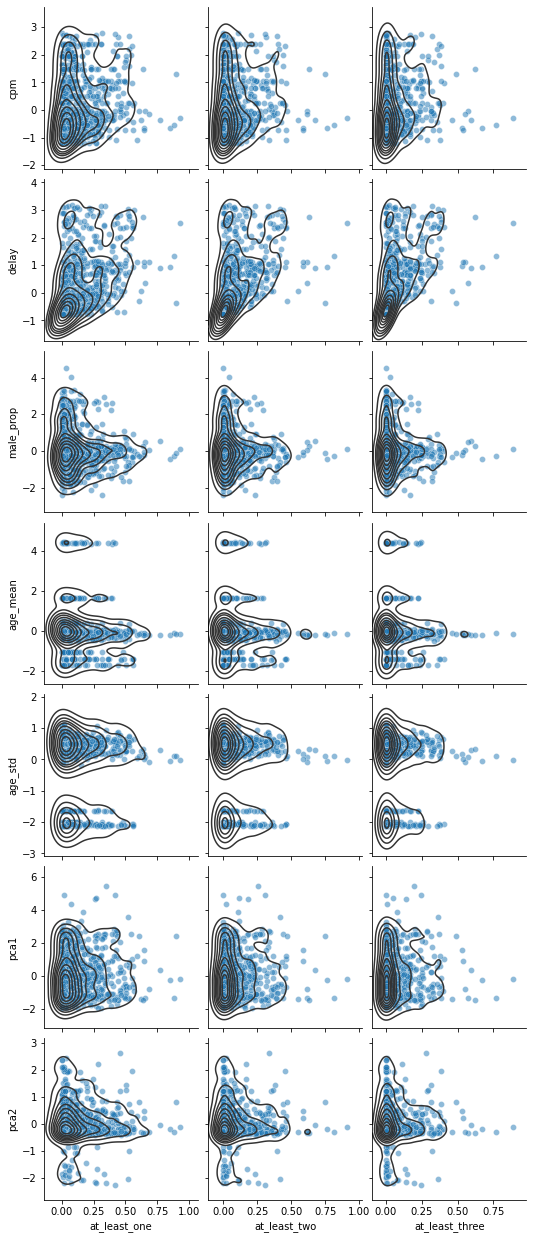

In [344]:
pp = sns.pairplot(df,
             y_vars = ['cpm', 'delay', 'male_prop', 'age_mean', 'age_std', 'pca1', 'pca2'],
             x_vars = ['at_least_one', 'at_least_two', 'at_least_three'],
             plot_kws = dict(alpha = 0.5),
             height = 2.5)
pp.map(sns.kdeplot, levels = 10, color = '.2')
plt.show()